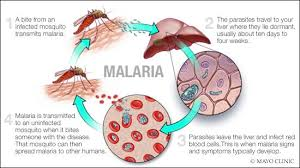

https://www.kaggle.com/code/krutarthhd/malaria-cell-image-classification-with-cnn-96-acc

# Importing neccessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Displaying Uninfected and Infected Cell tissues

In [3]:
width = 128
height = 128

# Dividing Dataset into two folders train and test

In [4]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing train and test Image Generator

In [6]:
valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [5]:
trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


# Preparing the model

In [7]:
model = Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [12]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =5,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Epoch 1/5
1378/1378 [==============================] - 256s 186ms/step - loss: 0.2307 - accuracy: 0.9286 - val_loss: 0.2014 - val_accuracy: 0.9388
Epoch 2/5
1378/1378 [==============================] - 209s 152ms/step - loss: 0.1686 - accuracy: 0.9498 - val_loss: 0.1842 - val_accuracy: 0.9410
Epoch 3/5
1378/1378 [==============================] - 208s 151ms/step - loss: 0.1556 - accuracy: 0.9555 - val_loss: 0.2037 - val_accuracy: 0.9372
Epoch 4/5
1378/1378 [==============================] - 207s 150ms/step - loss: 0.1396 - accuracy: 0.9563 - val_loss: 0.1870 - val_accuracy: 0.9446


In [21]:
# Evaluate the model on the validation data
evaluation = model.evaluate(valDatagen, steps=len(valDatagen))

# Print the test accuracy
print('Validation Accuracy of the Model: {}'.format(evaluation[1]))

345/345 [==============================] - 20s 57ms/step - loss: 0.1870 - accuracy: 0.9446
Validation Accuracy of the Model: 0.9446461200714111


In [23]:
model.save('Mmodel.h5')